# __Text Classification using RNN__

## Scenario 

Imagine you are working for a news aggregator platform that collects articles from various sources. To improve the user experience, the platform wants to automatically categorize these articles into relevant topics. This categorization will help users discover articles of interest more efficiently. 

## Objective 

Your task is to develop a text classification model using Recurrent Neural Networks (RNNs) to classify these articles into predefined topics or categories. The platform has provided you with a dataset containing text articles and their corresponding labels. Your model should be able to analyze the content of these articles and assign them to the most appropriate category. 

## Directions 

* Step 1: Importing the Libraries 

      -Import the necessary libraries using Python's import statements. 

      -These libraries include csv, tensorflow, numpy, Tokenizer and pad_sequences from TensorFlow's Keras module, and nltk for natural language processing. matplotlib is also imported for potential data visualization. 

* Step 2: Defining the Hyperparameters 

      -Set the value of vocab_size to 5000, representing the size of the vocabulary. 

      -Set the value of embedding_dim to 64, specifying the dimensionality of the word embeddings. 

      -Set the value of max_length to 200, indicating the maximum length of input sequences. 

      -Set the value of padding_type to post, specifying that padding should be added at the end of sequences. 

      -Set the value of trunc_type to post, indicating that truncation should be applied at the end of sequences. 

      -Set the value of oov_tok to OOV, representing the token to be used for out-of-vocabulary words. 

      -Set the value of training_portion to 0.8, representing the proportion of data to be used for training. 

* Step 3: Preprocessing the Data and Printing the Lengths of the Labels and Articles Lists. 

      -Define two empty lists, articles, and labels to store the articles and labels, respectively. 

      -Read the contents of the bbc-text.csv file using csv.reader and iterate through each row. 

      -Extract the label from the first column of each row and append it to the labels list. 

      -Process the article from the second column by removing stopwords and replacing consecutive spaces with a single space and then append it to the articles list. 

      -Print the lengths of the labels and articles lists to display the number of labels and processed articles, respectively. 

* Step 4: Splitting the Data into Training and Validation Sets 

      -Calculate the train_size by multiplying the length of the articles list with training_portion and converting it to an integer. 

      -Create train_articles by slicing the articles list from index 0 to train_size. 

      -Create train_labels by slicing the labels list from index 0 to train_size. 

      -Create validation_articles by slicing the articles list from train_size onward. 

      -Create validation_labels by slicing the labels list from train_size onward. 

      -Print the train_size to display the calculated value. The lengths of train_articles, train_labels, validation_articles, and validation_labels represent the number of items in each list. 


* Step 5: Initializing a Tokenizer and Fitting It on the Training Articles 

      -Initialize a Tokenizer object named tokenizer with the specified parameters: num_words representing the vocabulary size and oov_token representing the out-of-vocabulary token. 

      -Fit the tokenizer on the training articles (train_articles) using the fit_on_texts method. 

      -This step updates the tokenizer's internal word index based on the words in the training articles. 

      -Assign the word index obtained from the tokenizer to the variable word_index. 

      -Extract the first 10 items from the word_index dictionary. 

      -Print the resulting dictionary. 

* Step 6: Converting the Training Articles into Sequences Using the Tokenizer 

      -Convert the training articles (train_articles) into sequences using the texts_to_sequences method of the tokenizer object and assign the result to train_sequences. 

      -Print the sequence representation of the 11th training article (index 10) by accessing train_sequences[10]. 

* Step 7: Padding the Sequence 

      -Pad the sequences in train_sequences using the pad_sequences function . 

      -Set the maximum length of the padded sequences to max_length . 

      -Specify the padding type as padding_type and the truncation type as trunc_type . 

      -Assign the padded sequences to the variable train_padded. 

* Step 8: Printing the Length of Validation Sequences and the Shape of Validation Padded 

      -Convert the validation articles into sequences using the tokenizer and pad the sequences to a maximum length. Assign the result to validation_padded. 

      -Print the length of validation_sequences and the shape of validation_padded. 

      -Create a tokenizer for the labels and fit it on the labels list. 

      -Convert the training and validation labels into sequences using the label tokenizer and store the results in training_label_seq and validation_label_seq as NumPy arrays. 

* Step 9: Training the Model 

      -Create a sequential model using tf.keras.Sequential(). 

      -Add an embedding layer to the model with the specified vocabulary size (vocab_size) and embedding dimension (embedding_dim). 

      -Add a bidirectional LSTM layer to the model with the same embedding dimension. 

      -Add a dense layer to the model with the embedding dimension as the number of units and relu activation function. 

      -Add a dense layer with 6 units and the softmax activation function to the model. 

      -Print a summary of the model's architecture using model.summary(). 

* Step 10: Compiling the Model 

      -Compile the model using model.compile() with the loss function set to sparse_categorical_crossentropy, the optimizer set to adam, and the metrics set to accuracy. 

      -Set the number of epochs to 10. 

      -Train the model using model.fit() with the training padded sequences (train_padded) and training label sequences (training_label_seq). 

      -Specify the number of epochs as num_epochs, the validation data as the validation padded sequences (validation_padded) and validation label sequences (validation_label_seq), and verbose mode as 2. 

* Step 11: Plotting the Graph 

      -Define a function named plot_graphs that takes history and string as inputs. Inside the function, plot the training and validation values of the given metric (string) from the history object using plt.plot(). 

      -Set the x-axis label as Epochs and the y-axis label as the given metric (string). 

      -Call the plot_graphs function twice, first with history and accuracy as arguments, and then with history and loss as arguments. 

      -Display the generated plots showing the training and validation values of the accuracy and loss metrics over the epochs. 

     
     

In [1]:
# Natural Language Toolkit
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chentingkao/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Step 1: Importing the libraries
- Import the required libraries

In [2]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# In natural language processing (NLP), stopwords are common words that are usually removed from text
# before processing. These words typically do not contain significant meaning and are often filtered
# out to reduce noise and improve computational efficiency. Examples of stopwords in English include
# "and," "is," "in," "the," "of," and "to."
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
import matplotlib.pyplot as plt


2024-07-20 16:43:34.274861: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Step 2: Defining the Hyperparameter
- Set the value of __vocab_size__ to __5000__, representing the size of the vocabulary
- Set the value of __embedding_dim__ to __64__, specifying the dimensionality of the word embeddings
- Set the value of __max_length__ to __200__, indicating the maximum length of input sequences
- Set the value of __padding_type__ to __post__, specifying that padding should be added at the end of sequences
- Set the value of __trunc_type__ to __post__, indicating that truncation should be applied at the end of sequences
- Set the value of __oov_tok__ to __OOV__, representing the token to be used for out-of-vocabulary words
- Set the value of __training_portion__ to __0.8__, representing the proportion of data to be used for training

In [3]:
vocab_size = 5000
embedding_dim = 64
max_length = 200
padding_type = 'post'
trunc_type = 'post'
oov_tok = '<OOV>'
training_portion = .8

### Step 3: Preprocessing the Data and Printing the Lengths of the Labels and Articles Lists.

- Define two empty lists, articles, and labels to store the articles and labels, respectively
- Read the contents of the **bbc-text.csv** file using csv.reader and iterate through each row
- Extract the label from the first column of each row and append it to the labels list
- Process the article from the second column by removing stopwords and replacing consecutive spaces with a single space and then append it to the articles list
- Print the lengths of the labels and articles lists to display the number of labels and processed articles, respectively

In [4]:
articles = []
labels = []

with open("/Users/chentingkao/PracticeData/bbc-text.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    # reader here should be an iterator.
    next(reader)
    for row in reader:
        labels.append(row[0])
        article = row[1]
        for word in STOPWORDS:
            token = ' ' + word + ' '
            article = article.replace(token, ' ')
            # this line is weird.
            article = article.replace(' ', ' ')
        articles.append(article)
print(len(labels))
print(len(articles))

2225
2225


__Observations:__
- There are only **2,225** articles in the data.
- Then, we split into a training set and validation set, according to the parameter we set earlier, 80% for training, and 20% for validation.

### Step 4: Splitting the Data into Training and Validation Sets
- Calculate the **train_size** by multiplying the length of the articles list with __training_portion__ and converting it to an integer.
- Create **train_articles** by slicing the articles list from index **0** to **train_size**.
- Create **train_labels** by slicing the labels list from index** 0 **to **train_size**.
- Create **validation_articles** by slicing the articles list from **train_size** onward.
- Create **validation_labels** by slicing the labels list from **train_size** onward.
- Print the **train_size** to display the calculated value.

- The lengths of **train_articles**, **train_labels**, **validation_articles**, and **validation_labels** represent the number of items in each list.

In [5]:
train_size = int(len(articles) * training_portion)

train_articles = articles[0: train_size]
train_labels = labels[0: train_size]

validation_articles = articles[train_size:]
validation_labels = labels[train_size:]

print(train_size)
print(len(train_articles))
print(len(train_labels))
print(len(validation_articles))
print(len(validation_labels))

1780
1780
1780
445
445


__Observations:__
- The value of **train_size** is calculated based on the proportion of training data.
- The lengths of **train_articles**, **train_labels**, **validation_articles**, and **validation_labels** representing the number of items in each list.

### Step 5: Initializing a Tokenizer and Fitting It on the Training Articles

- Initialize a **Tokenizer** object named tokenizer with the specified parameters: **num_words** representing the vocabulary size and **oov_token** representing the out-of-vocabulary token.
- Fit the tokenizer on the training articles **(train_articles)** using the **fit_on_texts** method.
- This step updates the tokenizer's internal word index based on the words in the training articles.
- Assign the word index obtained from the tokenizer to the variable **word_index**.
- Extract the first 10 items from the **word_index** dictionary.
- Print the resulting dictionary.

In [6]:
# Out-of-Vocabulary Token
# This defines a token that will be used to represent words that are not in the tokenizer's vocabulary.
# When the tokenizer encounters a word in the input text that it has not seen before (i.e., it is "out-of-vocabulary"),
# it will replace that word with the <OOV> token.
# This is useful to handle words that appear in the test data but were not present in the training data,
# ensuring that the model can still process the input text without errors.
oov_tok = '<OOV>'

# This specifies the maximum number of words to keep in the tokenizer's vocabulary.
# The tokenizer will only keep the top 5000 most frequent words from the training data and discard the rest.
# Limiting the vocabulary size helps manage the memory and computational requirements, especially
# when working with large datasets.
vocab_size = 5000

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_articles)
word_index = tokenizer.word_index

In [7]:
# The <OOV> token is assigned the index 1.
# The rest of the words are assigned indices based on their frequency in the training data.
dict(list(word_index.items())[0:10])

{'<OOV>': 1,
 'said': 2,
 'mr': 3,
 'would': 4,
 'year': 5,
 'also': 6,
 'people': 7,
 'new': 8,
 'us': 9,
 'one': 10}

__Observations:__
- The code prints a dictionary containing the first 10 items from the word_index dictionary.
- These items represent a subset of the word-to-index mappings generated by the tokenizer.

### Step 6: Converting the Training Articles into Sequences Using the Tokenizer
- Convert the training articles **(train_articles)** into sequences using the **texts_to_sequences** method of the tokenizer object and assign the result to **train_sequences**
- Print the sequence representation of the 11th training article (index 10) by accessing **train_sequences[10]**

In [8]:
# Machine learning models, particularly neural networks, require numerical input.
# Words need to be converted into a numerical format that the model can process.
# This numerical format is usually a sequence of integers, where each integer
# represents a specific word in the vocabulary.

# Converting text to sequences standardizes the input format, making it easier
# to handle different lengths of text and manage padding or truncation.
train_sequences  = tokenizer.texts_to_sequences(train_articles)

print(train_sequences[10])

[2431, 1, 225, 4996, 22, 641, 587, 225, 4996, 1, 1, 1662, 1, 1, 2431, 22, 565, 1, 1, 140, 278, 1, 140, 278, 796, 822, 662, 2307, 1, 1145, 1693, 1, 1720, 4997, 1, 1, 1, 1, 1, 4738, 1, 1, 122, 4514, 1, 2, 2874, 1505, 352, 4739, 1, 52, 341, 1, 352, 2171, 3962, 41, 22, 3796, 1, 1, 1, 1, 543, 1, 1, 1, 835, 631, 2366, 347, 4740, 1, 365, 22, 1, 787, 2367, 1, 4302, 138, 10, 1, 3664, 682, 3532, 1, 22, 1, 414, 822, 662, 1, 90, 13, 633, 1, 225, 4996, 1, 599, 1, 1693, 1021, 1, 4998, 807, 1864, 117, 1, 1, 1, 2974, 22, 1, 99, 278, 1, 1607, 4999, 543, 493, 1, 1443, 4741, 779, 1320, 1, 1861, 10, 33, 641, 319, 1, 62, 479, 565, 301, 1506, 22, 480, 1, 1, 1665, 1, 797, 1, 3066, 1, 1364, 6, 1, 2431, 565, 22, 2971, 4735, 1, 1, 1, 1, 1, 850, 39, 1825, 675, 297, 26, 979, 1, 882, 22, 361, 22, 13, 301, 1506, 1342, 374, 20, 63, 883, 1096, 4303, 247]


__Observation:__
- The code prints the sequence representation of the 11th training article (index 10) in the **train_sequences** list.
- The output is a list of integers, where each integer represents the index of a word in the tokenizer's word index vocabulary that corresponds to a word in the article.

### Step 7: Padding the Sequence
- Pad the sequences in **train_sequences** using the **pad_sequences** function
- Set the maximum length of the padded sequences to **max_length**
- Specify the padding type as **padding_type** and the truncation type as **trunc_type**
- Assign the padded sequences to the variable **train_padded**

In [9]:
# This sets the maximum length for the sequences. All sequences will be padded or
# truncated to ensure they have this exact length.
max_length = 200
padding_type = 'post'
trunc_type = 'post'
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [10]:
print(train_sequences[10])

[2431, 1, 225, 4996, 22, 641, 587, 225, 4996, 1, 1, 1662, 1, 1, 2431, 22, 565, 1, 1, 140, 278, 1, 140, 278, 796, 822, 662, 2307, 1, 1145, 1693, 1, 1720, 4997, 1, 1, 1, 1, 1, 4738, 1, 1, 122, 4514, 1, 2, 2874, 1505, 352, 4739, 1, 52, 341, 1, 352, 2171, 3962, 41, 22, 3796, 1, 1, 1, 1, 543, 1, 1, 1, 835, 631, 2366, 347, 4740, 1, 365, 22, 1, 787, 2367, 1, 4302, 138, 10, 1, 3664, 682, 3532, 1, 22, 1, 414, 822, 662, 1, 90, 13, 633, 1, 225, 4996, 1, 599, 1, 1693, 1021, 1, 4998, 807, 1864, 117, 1, 1, 1, 2974, 22, 1, 99, 278, 1, 1607, 4999, 543, 493, 1, 1443, 4741, 779, 1320, 1, 1861, 10, 33, 641, 319, 1, 62, 479, 565, 301, 1506, 22, 480, 1, 1, 1665, 1, 797, 1, 3066, 1, 1364, 6, 1, 2431, 565, 22, 2971, 4735, 1, 1, 1, 1, 1, 850, 39, 1825, 675, 297, 26, 979, 1, 882, 22, 361, 22, 13, 301, 1506, 1342, 374, 20, 63, 883, 1096, 4303, 247]


__Observations:__
- The code prints the sequence representation of the 11th training article (index 10) in the **train_sequences** list.
- The output is a list of integers, where each integer represents the index of a word in the tokenizer's word index vocabulary that corresponds to a word in the article.

In [11]:
print(train_padded[10])

[2431    1  225 4996   22  641  587  225 4996    1    1 1662    1    1
 2431   22  565    1    1  140  278    1  140  278  796  822  662 2307
    1 1145 1693    1 1720 4997    1    1    1    1    1 4738    1    1
  122 4514    1    2 2874 1505  352 4739    1   52  341    1  352 2171
 3962   41   22 3796    1    1    1    1  543    1    1    1  835  631
 2366  347 4740    1  365   22    1  787 2367    1 4302  138   10    1
 3664  682 3532    1   22    1  414  822  662    1   90   13  633    1
  225 4996    1  599    1 1693 1021    1 4998  807 1864  117    1    1
    1 2974   22    1   99  278    1 1607 4999  543  493    1 1443 4741
  779 1320    1 1861   10   33  641  319    1   62  479  565  301 1506
   22  480    1    1 1665    1  797    1 3066    1 1364    6    1 2431
  565   22 2971 4735    1    1    1    1    1  850   39 1825  675  297
   26  979    1  882   22  361   22   13  301 1506 1342  374   20   63
  883 1096 4303  247    0    0    0    0    0    0    0    0    0    0
    0 

__Observation:__
- The code prints the padded sequence representation of the 11th training article.
- The output is a list of integers representing the word indices of the corresponding words in the article, after applying padding to ensure a consistent length (max_length) for all sequences.

### Step 8: Printing the Length of Validation Sequences and the Shape of Validation Padded
- Convert the validation articles into sequences using the tokenizer and pad the sequences to a maximum length. Assign the result to **validation_padded**
- Print the length of **validation_sequences** and the shape of **validation_padded**
- Create a tokenizer for the labels and fit it on the labels list
- Convert the training and validation labels into sequences using the label tokenizer and store the results in **training_label_seq** and **validation_label_seq** as NumPy arrays

In [12]:
validation_sequences = tokenizer.texts_to_sequences(validation_articles)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

445
(445, 200)


__Observations:__
- The length of **validation_sequences**, indicating the number of sequences in the validation set.
- The shape of **validation_padded**, representing the dimensions of the padded validation sequences.

In [17]:
print(set(labels))
print(set(validation_labels))

{'entertainment', 'politics', 'tech', 'sport', 'business'}
{'entertainment', 'politics', 'tech', 'sport', 'business'}


__Observation:__
- The output is a set containing the unique labels: 'business', 'tech', 'entertainment', 'politics', and 'sport'.

In [14]:
# labels has only 5 words. hence, we do not need to specify num_words and oov_token
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

label_word_index = label_tokenizer.word_index
dict(list(label_word_index.items())[0:10])

{'sport': 1, 'business': 2, 'politics': 3, 'tech': 4, 'entertainment': 5}

__Observations:__
- The output of this code is the conversion of label sequences for the training and validation sets.
- The **training_label_seq** and **validation_label_seq** are NumPy arrays containing the label sequences for the respective sets, based on the word index mapping generated by the **label_tokenizer**

### Step 9: Training the Model
- Create a sequential model using **tf.keras.Sequential()**
- Add an embedding layer to the model with the specified vocabulary size **(vocab_size)** and embedding dimension **(embedding_dim)**
- Add a bidirectional LSTM layer to the model with the same embedding dimension
- Add a dense layer to the model with the embedding dimension as the number of units and **relu** activation function
- Add a dense layer with 6 units and the **softmax** activation function to the model
- Print a summary of the model's architecture using **model.summary()**

In [15]:
model = tf.keras.Sequential([
    # Converts integer-encoded words into dense vectors of fixed size (embedding_dim).
    # Parameters:
    # vocab_size: The size of the vocabulary (number of unique tokens in the text).
    # embedding_dim: The dimension of the embedding vectors.
    # Output: A 3D tensor with shape (batch_size, sequence_length, embedding_dim).
    tf.keras.layers.Embedding(vocab_size, embedding_dim),

    # Purpose: Processes the sequence data in both forward and backward directions using an LSTM
    # (Long Short-Term Memory) layer, capturing context from both directions.
    # Parameters:
    # embedding_dim: The number of units in the LSTM cell (equal to the embedding dimension in this case).
    # Output: A 2D tensor with shape (batch_size, 2 * embedding_dim) because it concatenates the
    # forward and backward LSTM outputs.
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),

    tf.keras.layers.Dense(embedding_dim, activation='relu'),

    # why use 6? and why using 5 throws exception?
    tf.keras.layers.Dense(6, activation='softmax')
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

__Observation:__
- The code outputs a summary of the model's architecture, including the number of parameters and the shape of each layer in the model.

### Step 10: Compiling the Model
- Compile the model using **model.compile()** with the loss function set to **sparse_categorical_crossentropy**, the optimizer set to **adam**, and the metrics set to **accuracy**
- Set the number of epochs to 10
- Train the model using **model.fit()** with the training padded sequences **(train_padded)** and training label sequences **(training_label_seq)**
- Specify the number of epochs as **num_epochs**, the validation data as the validation padded sequences **(validation_padded)** and validation label sequences **(validation_label_seq)**, and **verbose** mode as **2**

In [16]:

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

num_epochs = 10

history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2)


Epoch 1/10


2024-07-20 16:44:54.218092: W tensorflow/core/framework/op_kernel.cc:1839] OP_REQUIRES failed at sparse_xent_op.cc:103 : INVALID_ARGUMENT: Received a label value of 5 which is outside the valid range of [0, 5).  Label values: 1 2 5 1 3 5 4 4 3 1 4 5 2 5 4 1 1 5 1 5 2 4 5 3 3 3 4 1 4 2 5 4
2024-07-20 16:44:54.218155: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: Received a label value of 5 which is outside the valid range of [0, 5).  Label values: 1 2 5 1 3 5 4 4 3 1 4 5 2 5 4 1 1 5 1 5 2 4 5 3 3 3 4 1 4 2 5 4
	 [[{{function_node __inference_one_step_on_data_4508}}{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]]


InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/asyncio/base_events.py", line 641, in run_forever

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/asyncio/base_events.py", line 1987, in _run_once

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/asyncio/events.py", line 88, in _run

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 534, in process_one

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 362, in execute_request

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 778, in execute_request

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 449, in do_execute

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3075, in run_cell

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3130, in _run_cell

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3334, in run_cell_async

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3517, in run_ast_nodes

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code

  File "/var/folders/kc/_2nh1fbx6dd_bl9j35w1q0zw0000gn/T/ipykernel_81331/2445750279.py", line 5, in <module>

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 318, in fit

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/trainer.py", line 357, in _compute_loss

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/trainer.py", line 325, in compute_loss

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/compile_utils.py", line 609, in __call__

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/compile_utils.py", line 645, in call

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/losses/loss.py", line 43, in __call__

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/losses/losses.py", line 27, in call

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/losses/losses.py", line 1853, in sparse_categorical_crossentropy

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/ops/nn.py", line 1567, in sparse_categorical_crossentropy

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py", line 645, in sparse_categorical_crossentropy

Received a label value of 5 which is outside the valid range of [0, 5).  Label values: 1 2 5 1 3 5 4 4 3 1 4 5 2 5 4 1 1 5 1 5 2 4 5 3 3 3 4 1 4 2 5 4
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_4591]

__Observations:__
- The code trains the model for the specified number of epochs and records the training and validation accuracy and loss metrics.
- The output is an object named history that contains information about the training process, such as the loss and accuracy values at each epoch.

### Step 11: Plotting the Graph
- Define a function named **plot_graphs** that takes history and string as inputs. Inside the function, plot the training and validation values of the given metric (string) from the history object using **plt.plot()**
- Set the x-axis label as **Epochs** and the y-axis label as the given metric (string)
- Call the **plot_graphs** function twice, first with **history** and **accuracy** as arguments, and then with **history** and **loss** as arguments
- Display the generated plots showing the training and validation values of the accuracy and loss metrics over the epochs

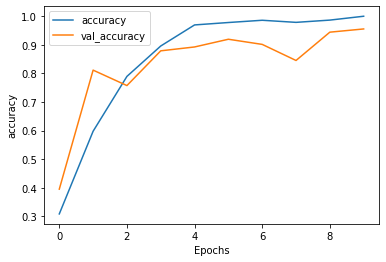

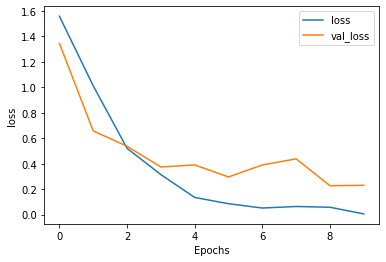

In [17]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")